TP0 - Parte B (Image)

(-0.5, 879.5, 586.5, -0.5)

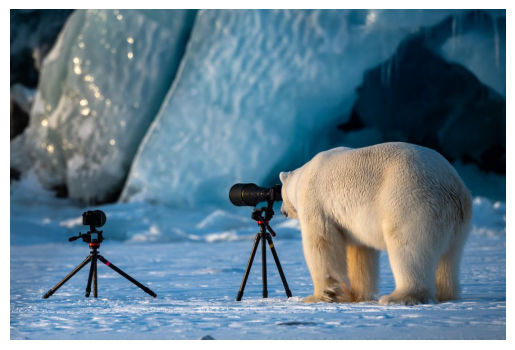

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load an image file (ex2)
file = '/Users/PC/Desktop/TCD/Repositório/TP0/polarbear.jpg'
img = mpimg.imread(file)

# Display the image (ex3)
plt.imshow(img)
plt.axis('off') # Turn off axis numbers


(-0.5, 879.5, 586.5, -0.5)

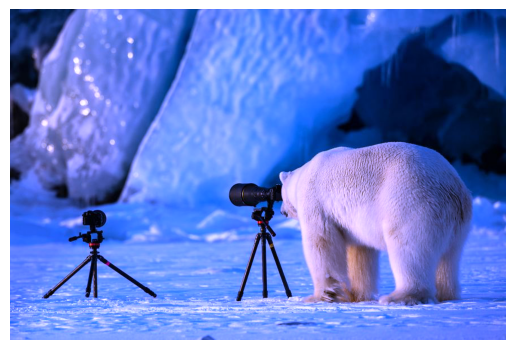

In [15]:
def enhanceColor(img, fator, canal):
    # transformar a imagem para float
    img = img.astype(float)
    # multiplicar pelo fator
    img[:,:,canal] = img[:,:,canal] * fator
    # transform back to uint8
    img = img.astype(int)
    # limitar os valores a 255 using clip
    img = img.clip(0, 255)
    return img

# CANAL 0 - RED, CANAL 1 - GREEN, CANAL 2 - BLUE
enhancedImg = enhanceColor(img, 1.8, 2)
plt.imshow(enhancedImg)
plt.axis('off') # Turn off axis numbers

(-0.5, 879.5, 586.5, -0.5)

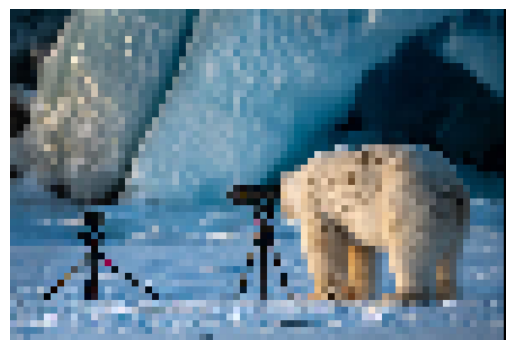

In [16]:
def imagemMosaico(img, W):
    import numpy as np
    # pixels in [j-floor(W/2), j+floor(W/2)] will received all the intensity of pixel j
    # Aply this to all the pixels in the image, and all the channels (colors)
    # The image will be a mosaic of the original image
    # get the size of the image
    width, height, channels = img.shape
    mosaicImg = np.zeros_like(img)

    # para cada bloco de tamanho W, copiar o pixel central para todos os pixeis do bloco
    for i in range(W//2, height, W):
        for j in range(W//2, width, W):
            mosaicImg[j-W//2:j+W//2, i-W//2:i+W//2] = img[j, i]

    for s in range(channels):
        mosaicImg[:,:,s] = mosaicImg[:,:,s].clip(0, 255)



    return mosaicImg
    


mosaicImg = imagemMosaico(img, 12)
plt.imshow(mosaicImg)
plt.axis('off') # Turn off axis numbers

(-0.5, 879.5, 586.5, -0.5)

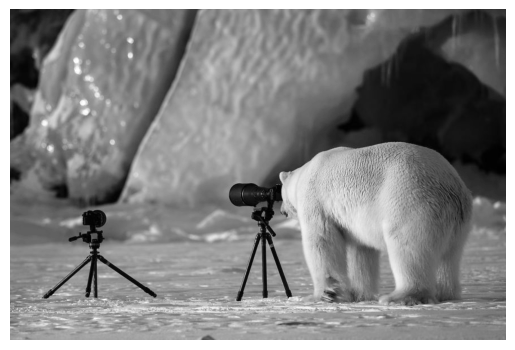

In [17]:
def color2gray(imgB):
    # transform the image to gray scale
    # imgB is a 3 channel image (its a blue image) 
    # o tal standard NTSC formula
    # Y[i,j] = 0.2978*R[i,j] + 0.5870*G[i,j] + 0.1140*B[i,j]
    grayImg = 0.2978*imgB[:,:,0] + 0.5870*imgB[:,:,1] + 0.1140*imgB[:,:,2]
    
    # the values are clipped to 0-255
    grayImg = grayImg.clip(0, 255)

    return grayImg

grayImg = color2gray(enhancedImg)
plt.imshow(grayImg, cmap='gray')
plt.axis('off') # Turn off axis numbers

(-0.5, 879.5, 586.5, -0.5)

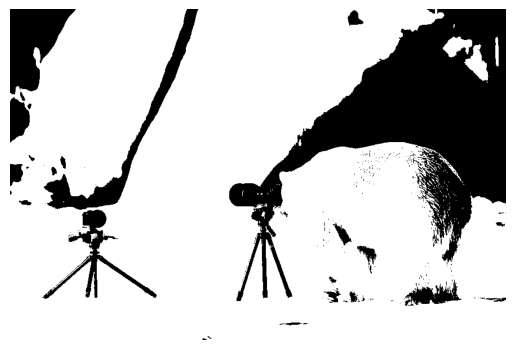

In [20]:
# Exercicio 7
def imagemBin(imgG, limiar):
    # transform the gray image to a binary image
    # if the pixel intensity is greater than the limiar, the pixel is white
    # if the pixel intensity is lower than the limiar, the pixel is black
    binImg = imgG > limiar
    return binImg

binImg = imagemBin(grayImg, 85)
plt.imshow(binImg, cmap='gray')
plt.axis('off') # Turn off axis numbers

(-0.5, 879.5, 586.5, -0.5)

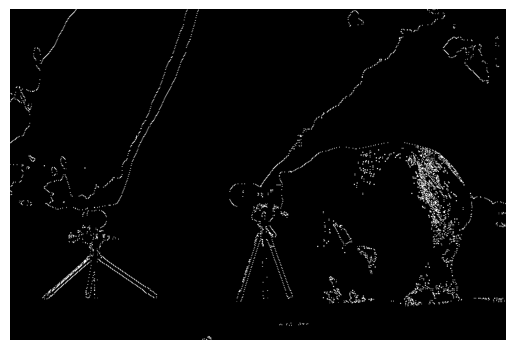

In [23]:
# Exercicio 8
def imagemCont(imgBin):
    # transform the binary image to a contour image
    # transition pixels from white to black is a contour, and have 255 intensity
    # transition pixels from black to white is a contour, and have 255 intensity
    # The reamining pixels have intensity 0
    contImg = imgBin.copy()
    # horizontal contours
    contImg[1:,:] = contImg[1:,:] ^ contImg[:-1,:]
    # vertical contours
    contImg[:,1:] = contImg[:,1:] ^ contImg[:,:-1]
    contImg = contImg * 255
    return contImg

contImg = imagemCont(binImg)
plt.imshow(contImg, cmap='gray')
plt.axis('off') # Turn off axis numbers